In [1]:
# Data from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

import pandas as pd
import seaborn as sns
cancer = pd.read_csv('breast_cancer.csv').drop(columns='Unnamed: 32')
cancer.shape

C:\Users\wardy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(569, 32)

In [2]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
len(cancer)==cancer.id.nunique()

True

In [4]:
cancer = cancer.set_index('id')
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

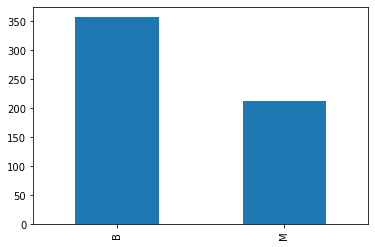

In [5]:
# Examining the class distribution - very important for classification
# This is a decent result - not perfectly balanced but not wildly imbalanced
cancer['diagnosis'].value_counts().plot.bar()

In [6]:
y = cancer['diagnosis'].map({'M':1, 'B':0})
y

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64

In [7]:
X = cancer.drop(columns='diagnosis')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [19]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier(n_estimators=1000, random_state=42)

In [20]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
prob_1 = classifier.predict_proba(X_test)[:,1] # probability of cancer
prob_0 = classifier.predict_proba(X_test)[:,0] # probability of not cancer

In [22]:
evaluate = pd.DataFrame({
    'actual': y_test,
    'pred_cancer': prob_1
})

alpha = 0.5

evaluate['predicted'] = (evaluate['pred_cancer'] > alpha) * 1
evaluate

,actual,pred_cancer,predicted
id,,,
87930,0,0.045,0
859575,1,0.999,1
8670,1,0.989,1
907915,0,0.002,0
921385,0,0.000,0
...,...,...,...
859487,0,0.008,0
921644,0,0.176,0
872608,0,0.022,0


In [12]:
predicted = classifier.predict(X_test)
actual = y_test

evaluate = pd.DataFrame({
    "actual": actual,
    "predicted": predicted
})

evaluate['correct'] = evaluate['actual'] == evaluate['predicted']
evaluate['correct'].mean()

0.9649122807017544

In [13]:
from sklearn import metrics
metrics.accuracy_score(y_test, predicted)

0.9649122807017544

In [26]:
# This means - reading across:
# [TN, FP]
# [FN, TP]

cm = metrics.confusion_matrix(y_test, predicted)
cm

array([[106,   2],
       [  4,  59]], dtype=int64)

In [29]:
# True Positive Rate / Recall / Sensitivity
cm[1][1] / sum(cm[1])

0.9365079365079365

In [30]:
metrics.recall_score(y_test, predicted)

0.9365079365079365

In [32]:
# True Negative Rate / Precision / Specificity

cm[1][1] / (cm[0][1] + cm[1][1])

0.9672131147540983

In [33]:
metrics.precision_score(y_test, predicted)

0.9672131147540983

In [14]:
# Reminder on definitions
# Sensitivity/recall – how good a test is at detecting the positives. 
# Specificity/precision – how many of the positively classified were relevant.

print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       108
          1       0.97      0.94      0.95        63

avg / total       0.96      0.96      0.96       171

